# Data Cleansing Procedcures

There four identifiable categories of data cleansing activities:
- Missing data
- Irregular data
- Unnecessary data
- Inconsistent data

This notebook will provide an example of the python code and procedures to perform these four data cleansing activities.

Full credit goes to "Lianne & Justin" and is based on their Medium article "Data Cleaning in Python: the Ultimate Guide (2020)"

https://link.medium.com/CUwtGTwR53

## Library Set Up 

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None 

## Read the Data and Summarize

In [2]:
df = pd.read_csv('train.csv')

In [3]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

(30471, 292)
id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


Take note of the data types for any obvious typing that will hinder statisitical analysis.  For example, timestamps that are stings and not an actual "datatime" format. Also, features that should be numeric and are "object" type.  This will become more apparent with the next instruction.

In [4]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

In [5]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'water_1line'
 'big_road1_1line' 'railroad_1line' 'ecology']


## Missing Data

### Missing Data Heatmap 

The heatmap will show a specified number of columns or variables.  There are two colors assigned: yellow for missing data and blue

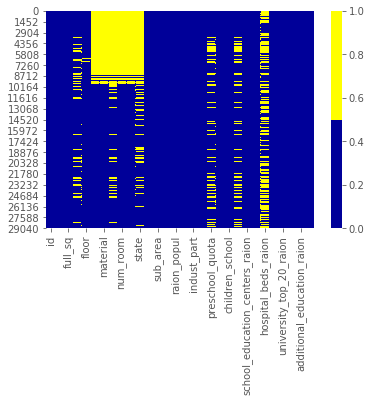

In [6]:
cols = df.columns[:30]   # assign first 30 columns
colors = ['#000099', '#ffff00']    # specify the colors as yellow and blue
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))  

### Missing Data Percentage List

 If it's a larger dataset and visualization takes too long this is a good alternative

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
timestamp - 0.0%
full_sq - 0.0%
life_sq - 21.0%
floor - 1.0%
max_floor - 31.0%
material - 31.0%
build_year - 45.0%
num_room - 31.0%
kitch_sq - 31.0%
state - 44.0%
product_type - 0.0%
sub_area - 0.0%
area_m - 0.0%
raion_popul - 0.0%
green_zone_part - 0.0%
indust_part - 0.0%
children_preschool - 0.0%
preschool_quota - 22.0%
preschool_education_centers_raion - 0.0%
children_school - 0.0%
school_quota - 22.0%
school_education_centers_raion - 0.0%
school_education_centers_top_20_raion - 0.0%
hospital_beds_raion - 47.0%
healthcare_centers_raion - 0.0%
university_top_20_raion - 0.0%
sport_objects_raion - 0.0%
additional_education_raion - 0.0%
culture_objects_top_25 - 0.0%
culture_objects_top_25_raion - 0.0%
shopping_centers_raion - 0.0%
office_raion - 0.0%
thermal_power_plant_raion - 0.0%
incineration_raion - 0.0%
oil_chemistry_raion - 0.0%
radiation_raion - 0.0%
railroad_terminal_raion - 0.0%
big_market_raion - 0.0%
nuclear_reactor_raion - 0.0%
detention_facility_raion - 0.0%
full_

### Missing Data Histogram

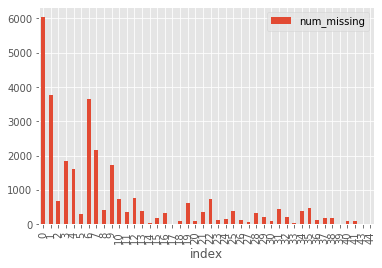

In [33]:
# first create the missing indicator for features with the missing data
# the histogram only plots the features with missing data
# you may not want to delete the features immediately but to have an identifier that helps you include or exclude them in later transformation steps

for col in df.columns:
        missing = df[col].isnull()
        num_missing = np.sum(missing)
        
        if num_missing > 0:
            print('create missing indicator for {}'.format(col))
            df['{}_ismissing'.format(col)] = missing
            
# next plot the histogram of missing values based on the indicator
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

## Missing Data Solutions

Once you have identified the features or columns with a large portion of observations with missing values, you will need to determine if it is worth retaining the feature or eliminating it.  This may be done based on statistical analysis or with simple-but reliable-common sense or domain knowledge.  

If you determine a feature is worth retaining, then you will decide whether of not to drop the observations or impute missing values.

### Drop the observations with missing values

Based on a threshold you select, the rows will be removed from the dataset

In [34]:
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

# view an example of an observation that is left in the dataset
print(pd.DataFrame(df_less_missing_rows, index=[50]))

    id   timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
50  51  2011-10-03       51     33.0    1.0       12.0       1.0      1979.0   

    num_room  kitch_sq  ...  prom_part_5000_ismissing  \
50       2.0       6.0  ...                     False   

   cafe_sum_5000_min_price_avg_ismissing  \
50                                 False   

   cafe_sum_5000_max_price_avg_ismissing  cafe_avg_price_5000_ismissing  \
50                                 False                          False   

    num_missing  sub_area_lower  timestamp_dt  year  month  weekday  
50            6        caricyno    2011-10-03  2011     10       10  

[1 rows x 349 columns]


### Drop the feature or column

It is important to make supported decisions about which columns to drop.  In other words, being sure that they variable does not have a material impact on the ultimate analysis.  If a variable or feature is relevant, there are ways to impute the values (to be described later).

In [35]:
# Assuming a larger percentage of missing data in an insignificant variable; you have identified specific columns
# Name the column
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis = 1)

### Impute missing values

There are many statistical methods to impute missing values.  For example, if the feature is numerical you may use the average or median.  If it is a categorical variable, you might use the mode or most frequent value.

#### Median value for a specific column

In [36]:
# Replace the missing values with the median for a named column/variable
med = df['life_sq'].median()
print(med)

df['life_sq'] = df['life_sq'].fillna(med)
print(df['life_sq'])    # you can see which observations have the imputed value (assuming it was not coincidentally equal to the media already)

30.0
0        27.0
1        19.0
2        29.0
3        50.0
4        77.0
         ... 
30466    27.0
30467    59.0
30468    30.0
30469    32.0
30470    28.0
Name: life_sq, Length: 30471, dtype: float64


#### Median value for all columns

In [12]:
# Replace the missing values with the median for all numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # limit to columns with missing values
        print('imputing missing value for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing value for: floor
imputing missing value for: max_floor
imputing missing value for: material
imputing missing value for: build_year
imputing missing value for: num_room
imputing missing value for: kitch_sq
imputing missing value for: state
imputing missing value for: preschool_quota
imputing missing value for: school_quota
imputing missing value for: hospital_beds_raion
imputing missing value for: raion_build_count_with_material_info
imputing missing value for: build_count_block
imputing missing value for: build_count_wood
imputing missing value for: build_count_frame
imputing missing value for: build_count_brick
imputing missing value for: build_count_monolith
imputing missing value for: build_count_panel
imputing missing value for: build_count_foam
imputing missing value for: build_count_slag
imputing missing value for: build_count_mix
imputing missing value for: raion_build_count_with_builddate_info
imputing missing value for: build_count_before_1920
imputing missing

#### Categorical variables

In [37]:
# Impute missing values for categorical variables
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0: 
        print('imputing valuess for : {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top']    # most frequent value
        df[col] = df[col].fillna(top)

### Replace the missing values

- For categorical features use a non-numeric value that will not be confused with an actual category
- For numeric features use distinct number that will not be confused with an actual value
- Analysis will be able to exclude observations with the given value

In [38]:
# Categorical
df['sub_area'] = df['sub_area'].fillna('_MISSING_')

# Numeric
df['life_sq'] = df['life_sq'].fillna(-999)

# Irregular Data or Outliers

Outliers are values that are outside a "reasonable" range for that feature.  We want to remove them because they will skew analysis unnecessarily

## Histogram or Box Plot

Applicable for numerical features

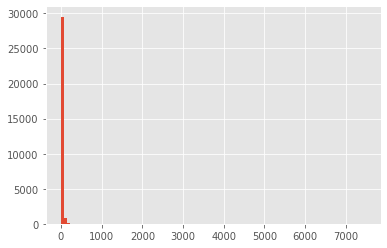

In [15]:
df['life_sq'].hist(bins=100)

The histogram shows that the feature is skewed with values close to 0 with a low percentage of irregular observations. This approach will not effectively tell us what the outlier values are, therefore, we will try to the box plot.

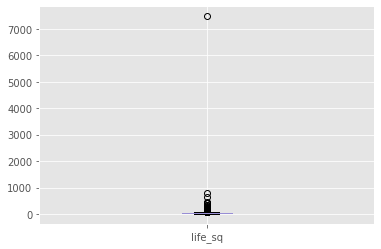

In [16]:
df.boxplot(column=['life_sq'])

## Descriptive Statistics

This should usually be our first stop in exploratory data analysis.  The objective is to understand the statisitical nature of the dataset.  The approach here is to look at one column at a time.  

In [17]:
df['life_sq'].describe()

count    30471.000000
mean        33.480883
std         46.522251
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

## Bar Chart

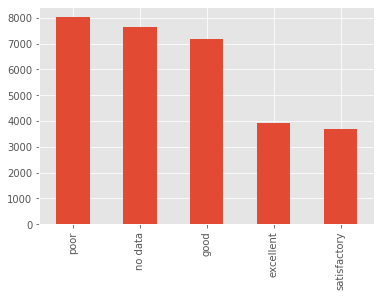

In [18]:
df['ecology'].value_counts().plot.bar()

# Unnecessary Data

A dataset may have an expansive set of variables.  However, not all of them will be useful or enhance the analysis or model.  There are three primary types to look for:

- Uninformative or repetitive
- Irrelevant
- Duplicates

##  Uninformative or Repetitive

The result will be either the distribution of counts if discrete or categorical type or the count of observations with data versus not.

In [19]:
num_rows = len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

oil_chemistry_raion: 99.02858%
no     30175
yes      296
Name: oil_chemistry_raion, dtype: int64

railroad_terminal_raion: 96.27187%
no     29335
yes     1136
Name: railroad_terminal_raion, dtype: int64

nuclear_reactor_raion: 97.16780%
no     29608
yes      863
Name: nuclear_reactor_raion, dtype: int64

build_count_foam: 95.35624%
0.0     29056
1.0       969
11.0      262
2.0       184
Name: build_count_foam, dtype: int64

big_road1_1line: 97.43691%
no     29690
yes      781
Name: big_road1_1line, dtype: int64

railroad_1line: 97.06934%
no     29578
yes      893
Name: railroad_1line, dtype: int64

cafe_count_500_price_high: 97.25641%
0    29635
1      787
2       38
3       11
Name: cafe_count_500_price_high, dtype: int64

mosque_count_500: 99.51101%
0    30322
1      149
Name: mosque_count_500, dtype: int64

cafe_count_1000_price_high: 95.52689%
0    29108
1     1104
2      145
3       51
4       39
5       15
6        8
7        1
Name: cafe_count_1000_price_high, dtype: int64

mosq

## Irrelevant

This is a logical, common sense decision that does not necessarily need any statistical analysis, simply domain knowledge

## Duplicates

There are typically two variations of this:
- All feature based
- Key feature based

### All Features

In [20]:
# write an explanation

df_dedupped = df.drop('id', axis=1).drop_duplicates()

print(df.shape)
print(df_dedupped.shape)

(30471, 344)
(30461, 343)


### Key Features

Refers to separate observations (i.e. transactions), but we know are duplicates based on the variables that are identifiers.

In [21]:
key = ['timestamp', 'full_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(40)

timestamp   full_sq  floor  build_year  num_room  price_doc
2014-11-28  34       7.0    2015.0      1.0       3613360      2
2014-03-24  40       11.0   1979.0      1.0       3888520      2
2015-03-14  62       2.0    1979.0      2.0       6520500      2
2013-05-22  68       2.0    1979.0      2.0       5406690      2
2013-12-05  40       5.0    1979.0      1.0       4414080      2
2014-04-10  63       12.0   1979.0      2.0       5410484      2
2013-04-03  42       2.0    1979.0      2.0       3444000      2
2013-07-10  55       3.0    1979.0      2.0       3196725      2
2014-11-25  39       7.0    0.0         1.0       4634301      2
2014-04-24  40       16.0   1979.0      1.0       4400000      2
2014-04-15  134      1.0    0.0         3.0       5798496      2
2013-12-18  39       6.0    1979.0      1.0       3700946      2
2012-08-27  59       6.0    1979.0      2.0       4506800      2
2013-09-23  85       14.0   1979.0      3.0       7725974      2
2013-06-24  40       12.0   19

In [22]:
# drop duplicates based on a subset of variables

key = ['timestamp', 'full_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(30471, 344)
(30448, 344)


## Inconsistent Data

### Capitalization

In [23]:
# Evaluate the count of each distinct value in a column to look for inconsistencies
df['sub_area'].value_counts(dropna=False)

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

In [24]:
# Put the values in all caps or lower case
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie shhapovskoe                2
poselenie kievskij                   2
poselenie klenovskoe                 1
poselenie mihajlovo-jarcevskoe       1
Name: sub_area_lower, Length: 146, dtype: int64

### Formating

This example focuses on the "timestamp" variable

In [25]:
df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,num_missing,sub_area_lower
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,9,bibirevo
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,6,nagatinskij zaton
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,6,tekstil'shhiki
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,7,mitino
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,6,basmannoe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,False,False,False,False,False,False,False,False,1,otradnoe
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,False,False,False,False,False,False,False,False,0,tverskoe
30468,30471,2015-06-30,45,30.0,10.0,20.0,1.0,1979.0,1.0,1.0,...,False,False,False,False,False,False,False,False,21,poselenie vnukovskoe
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,False,False,False,False,False,False,False,False,0,obruchevskoe


In [26]:
df['timestamp']

0        2011-08-20
1        2011-08-23
2        2011-08-27
3        2011-09-01
4        2011-09-05
            ...    
30466    2015-06-30
30467    2015-06-30
30468    2015-06-30
30469    2015-06-30
30470    2015-06-30
Name: timestamp, Length: 30471, dtype: object

In [39]:
# We can see that "timestamp" is in string form (object type) which is difficult to analyze and should be converted to a timestamp
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.month

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

2014    13662
2013     7978
2012     4839
2015     3239
2011      753
Name: year, dtype: int64

12    3400
4     3191
3     2972
11    2970
10    2736
6     2570
5     2496
9     2346
2     2275
7     1875
8     1831
1     1809
Name: month, dtype: int64


In [28]:
df['timestamp_dt']

0       2011-08-20
1       2011-08-23
2       2011-08-27
3       2011-09-01
4       2011-09-05
           ...    
30466   2015-06-30
30467   2015-06-30
30468   2015-06-30
30469   2015-06-30
30470   2015-06-30
Name: timestamp_dt, Length: 30471, dtype: datetime64[ns]

### Categorical Values

A dataset is created to illustrate this since there is not cleansing required in the set being used in this exercise

A statisitical function is used to evaluate various values and determine if they are likely to be the same as the named ones

In [40]:
from nltk.metrics import edit_distance

df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})


df_city_ex['city_distance_toronto'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'toronto'))
df_city_ex['city_distance_vancouver'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'vancouver'))
df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,torontoo,1,8
1,toronto,0,8
2,tronto,1,8
3,vancouver,8,0
4,vancover,7,1
5,vancouvr,7,1
6,montreal,7,8
7,calgary,7,8


Now that we have identified values that are spelled wrong, we can change the value to the correct one

In [43]:
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,toronto,1,8
1,toronto,0,8
2,toronto,1,8
3,vancouver,8,0
4,vancouver,7,1
5,vancouver,7,1
6,montreal,7,8
7,calgary,7,8


### Addresses

In [46]:
# adding an address column with messy formatted addresses
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av.


In [49]:
df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip()  # This removes leading and trailing white spaces
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '')    # Remove periods
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st')    #Replace "street" with "st"
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt')
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave')

df_add_ex

,address,address_std
0,123 MAIN St Apartment 15,123 main st apt 15
1,123 Main Street Apt 12,123 main st apt 12
2,543 FirSt Av.,543 first ave
